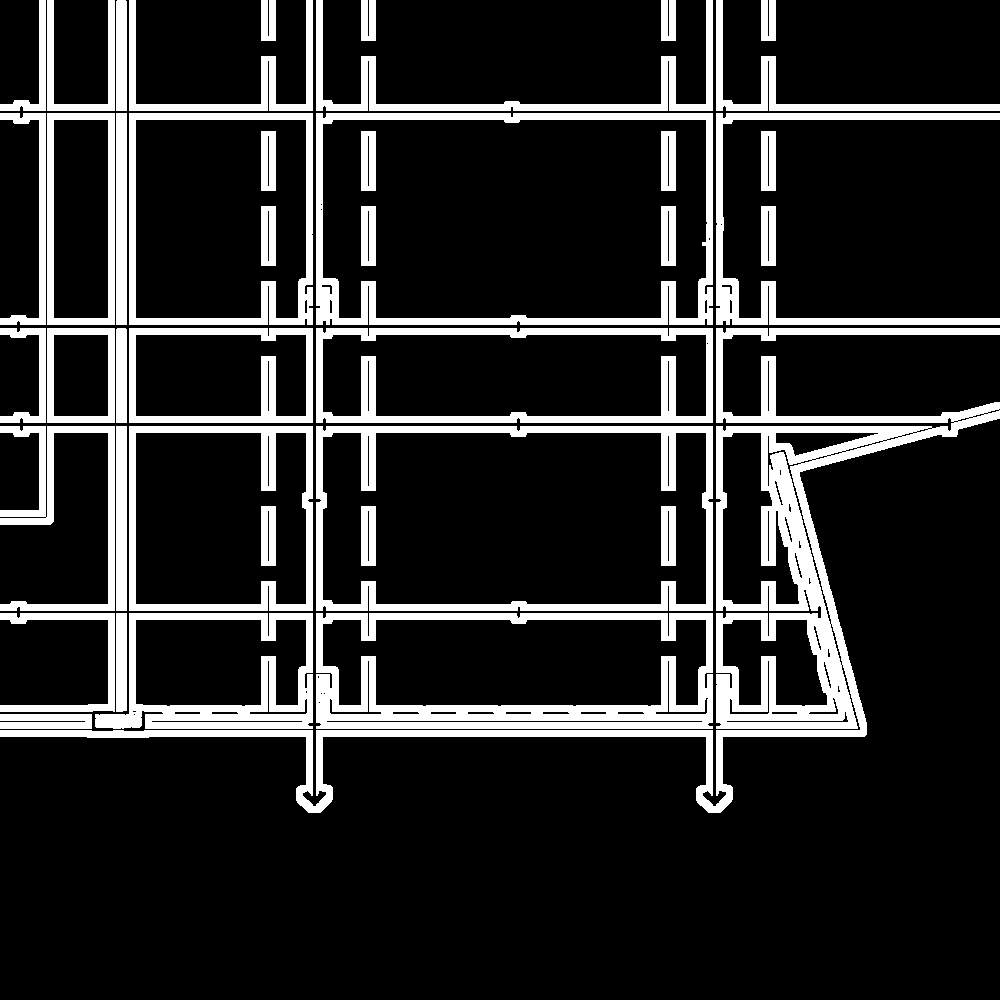

In [1]:
import numpy as np
from PIL import Image
import cv2

img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/original.png")
height, width = img.shape[:2]

tile = img[3000:4000, 4000:5000].copy()

gray = cv2.cvtColor(tile, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((2, 2), np.uint8)
erode = cv2.erode(thresh, kernel)

bw = cv2.adaptiveThreshold(
    erode, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY_INV,
    15, 3
)

Image.fromarray(bw)

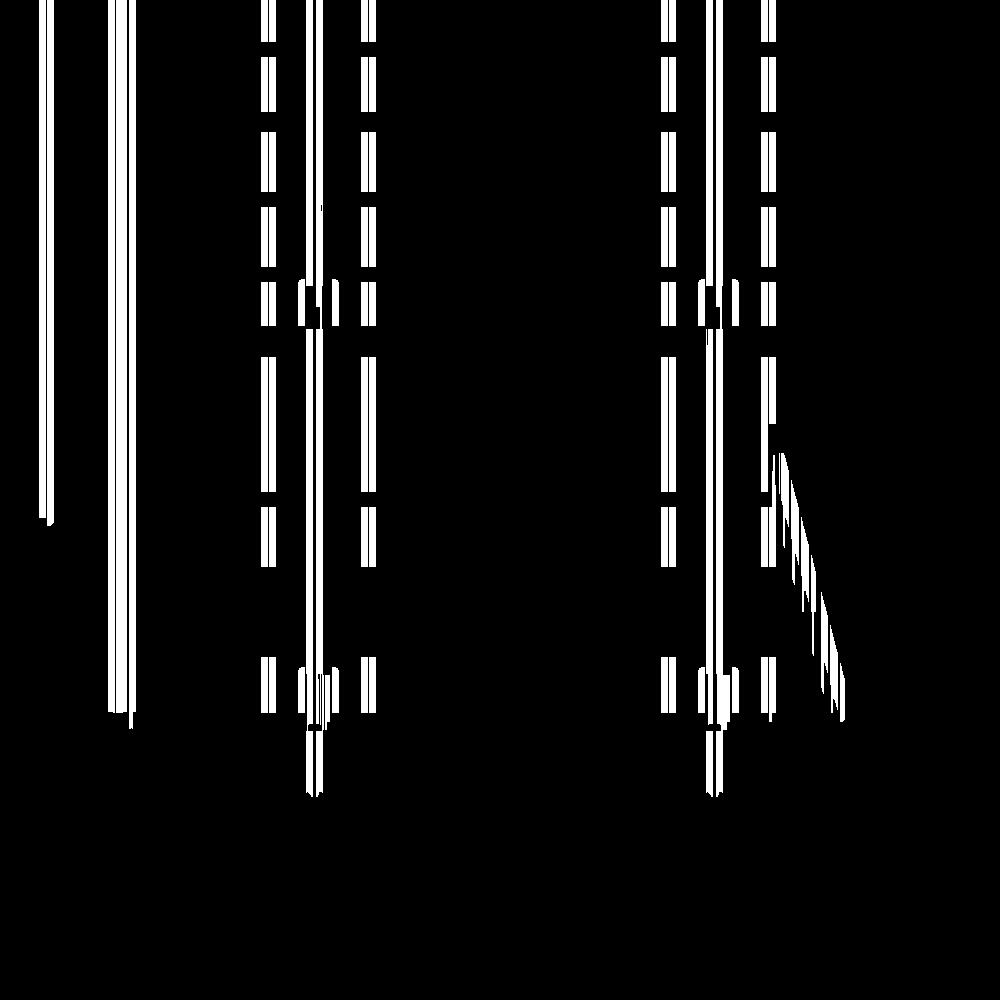

In [2]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 40))
vertical = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)
vertical = cv2.morphologyEx(vertical, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5)))

Image.fromarray(vertical)

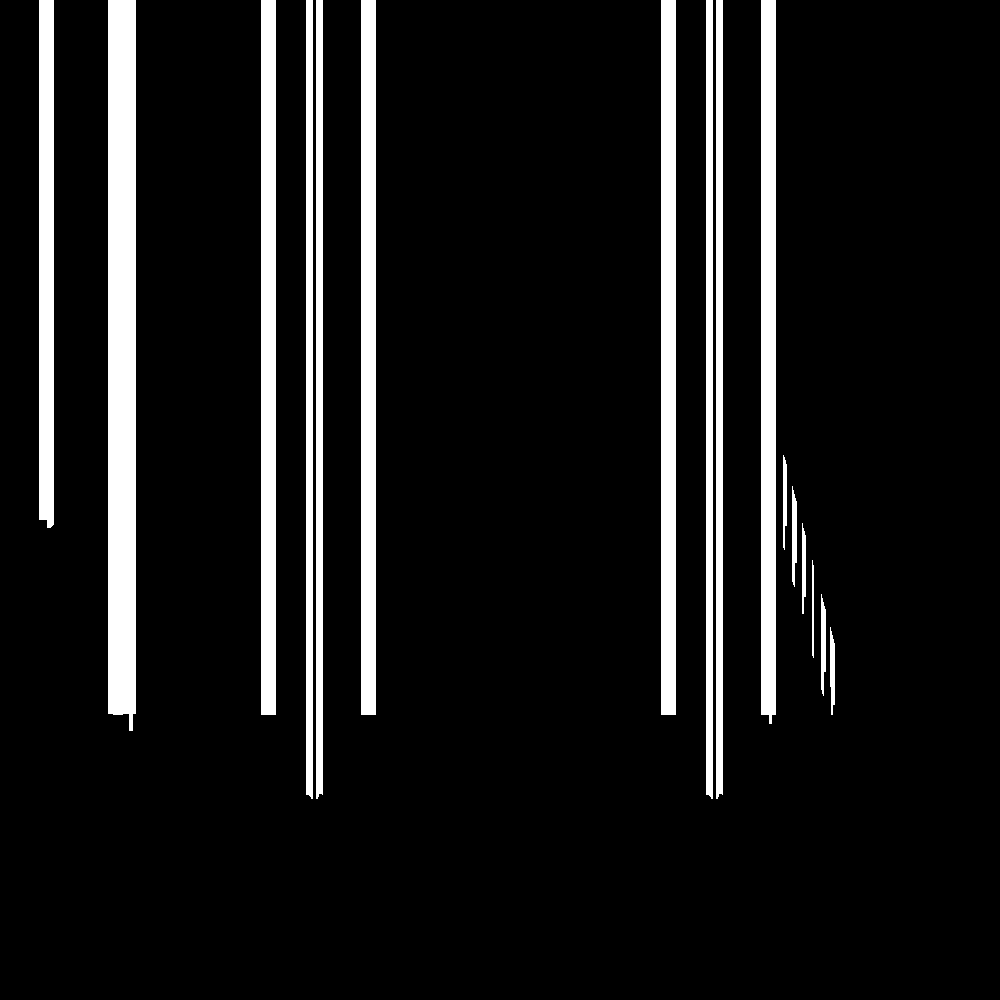

In [3]:
bridge_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 100))
vertical = cv2.morphologyEx(vertical, cv2.MORPH_CLOSE, bridge_kernel)
extract_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 60))
vertical = cv2.morphologyEx(vertical, cv2.MORPH_OPEN, extract_kernel)

Image.fromarray(vertical)

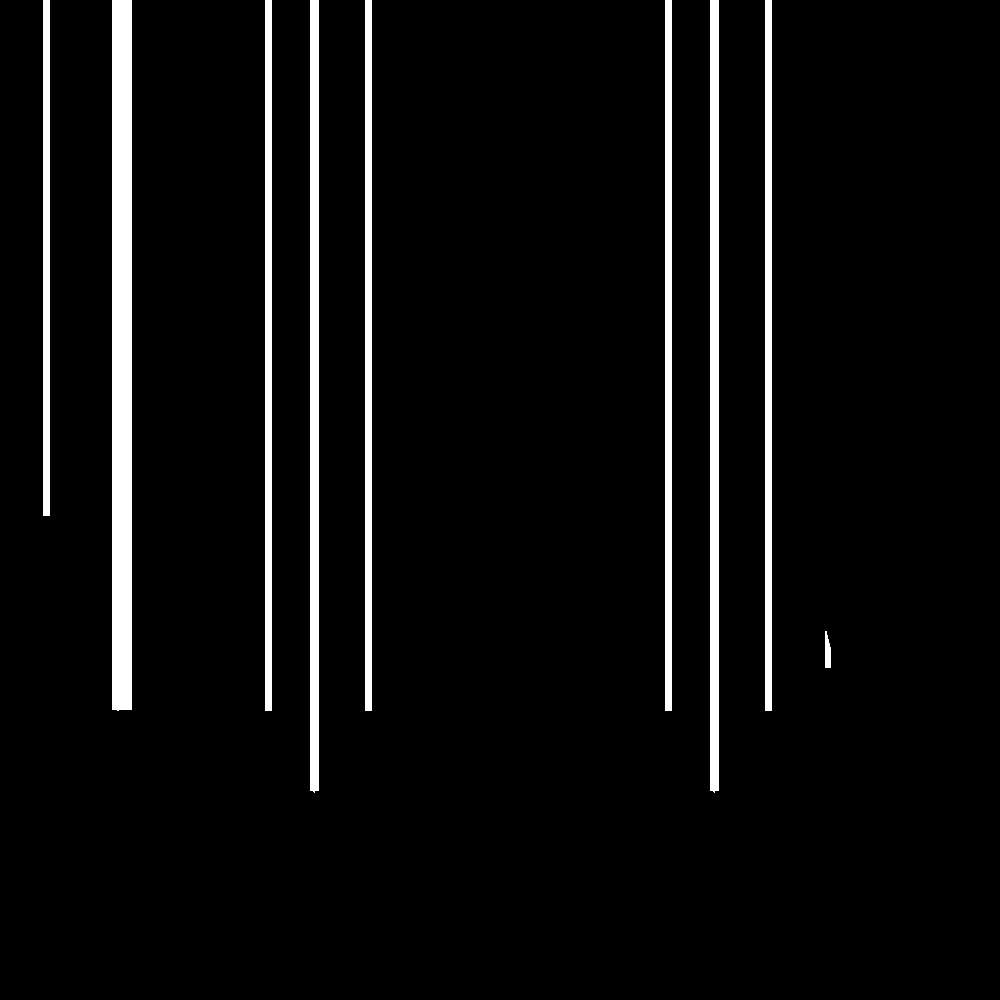

In [4]:
kernel = np.ones((5, 5), np.uint8)
vertical = cv2.dilate(vertical, kernel)
vertical = cv2.erode(vertical, kernel, iterations=3)

Image.fromarray(vertical)

7


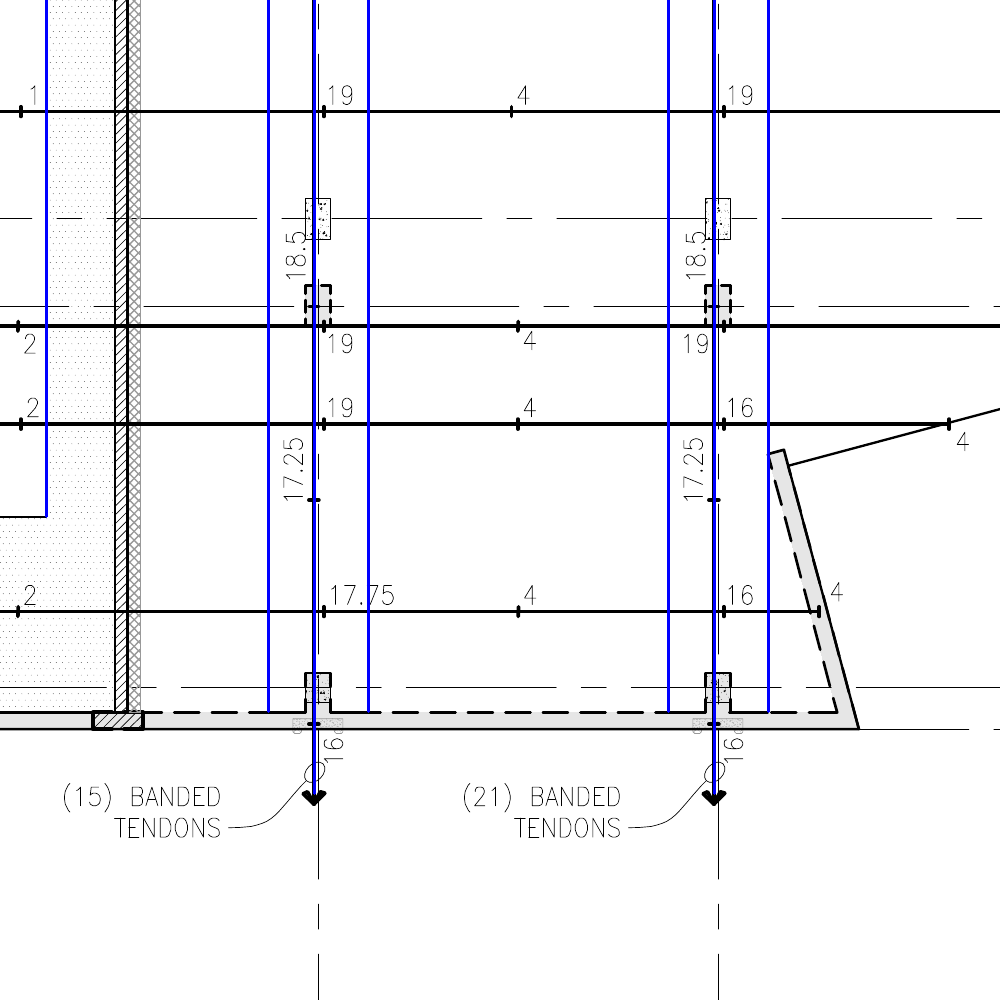

In [5]:
contours, _ = cv2.findContours(
    vertical,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

final_lines = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if h > 100 and w < 15:
        final_lines.append((x + w//2, y, x + w//2, y + h))

print(len(final_lines))
image_copy = tile.copy()
if final_lines is not None:
    for l in final_lines:
        x1, y1, x2, y2 = l
        cv2.line(image_copy, (x1, y1), (x2, y2), (0, 0, 255), 2)

Image.fromarray(image_copy)